# **kNN Regressor**
We are trying to predict the wine quality with a kNN regressor on a dataset wine quality available on Kaggle. below is a flow of how to use the kNN regressor on the wine quality data.

### **Notebook-Flow**
1. Importing libraries
2. Importing dataset
3. Data splitting to train and test sets
4. Feature scaling
5. Model building and fitting on multiple k values
6. Plotting MSE graph to get optimal k
7. Performance metrics on regressor model

**Import necessary packages**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

**Load the wine quality dataset into a pandas DataFrame.**

In [ ]:
data = pd.read_csv("wine-quality.csv")
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


**Train-test split**

In [ ]:
# Separate the features (X) and the target variable (y).
X = data.drop('quality', axis=1)
y = data['quality']
# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3918, 11)
X_test shape: (980, 11)
y_train shape: (3918,)
y_test shape: (980,)


**Feature scaling - normalization of values**

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train[:5])
print(X_test[:5])

[[ 5.15119310e-01 -1.07623315e+00  2.27730764e-01  3.40419470e-01
  -8.13688488e-01  5.34064605e-01 -6.41932319e-01 -4.47040725e-01
  -3.28261014e-01 -7.02444738e-01  1.54037099e+00]
 [-6.69188091e-01 -2.88776731e-01  8.95831948e-01  1.00207124e+00
  -2.17211567e-01  7.73947112e-01  1.35510550e+00  9.03369755e-01
  -6.18856911e-02  2.66074147e-01 -8.21711966e-01]
 [-1.49820327e+00  4.00247639e-01 -2.28071805e-02  1.84736700e-01
  -4.00742927e-01 -6.05377303e-01 -1.02232048e+00 -4.60280044e-01
   4.04271124e-01  1.93263316e-03  4.81506217e-01]
 [ 4.13963498e-02 -8.79369048e-01  1.44218115e-01 -9.24503038e-01
  -4.46625767e-01 -1.25612289e-01 -8.79674917e-01 -3.04718052e-01
   1.37895801e-01  4.42168490e-01  2.37152807e-01]
 [ 9.88842271e-01  2.03383533e-01 -6.07395717e-01  2.43240669e+00
   3.33382515e-01  5.42995912e-02  8.55846045e-01  1.88307932e+00
   7.13019704e-02  8.99798045e-02 -8.86517384e-02]]
[[-1.02448031  0.10495148  0.645294    0.84638847  0.10396831  1.1937415
   0.261489

**Call in the kNN regressor model from sklearn library and run it for some k values**

In [ ]:
# Initialize a kNN Regressor model with a specified number of neighbors (k).
# Set the number of neighbors
# call in the model
# Fit the model to the training data.
# Use the trained model to make predictions on the testing data.
# Calculate the mean squared error to evaluate the model's performance.

In [ ]:
# loop out on k to have the optimal k value.
mses = []
k = [3,4,5,6,7,8,9,10]
for i in range(0,len(k)):
    model = KNeighborsRegressor(n_neighbors=k[i], metric='minkowski', p=2)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mses.append(mean_squared_error(y_test, y_pred))


**Plot the MSE vs k graph to find "k" with least MSE.**

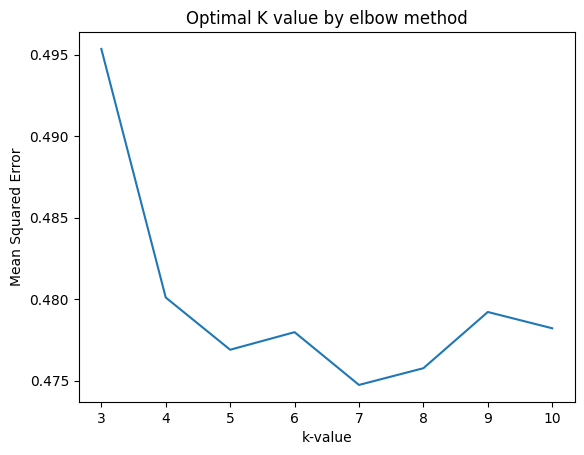

In [ ]:
plt.plot(k, mses)
plt.title("Optimal K value by elbow method")
plt.xlabel("k-value")
plt.ylabel("Mean Squared Error")
plt.show()

**From above the optimal "k" value is 7, which gives MSE as 0.475.**

**Performance metrics for regression task:**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = KNeighborsRegressor(n_neighbors=7, metric='minkowski', p=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Assuming y_test is your true labels for X_test
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2: ", r2)

MAE:  0.5255102040816326
MSE:  0.47473969179508546
RMSE:  0.6890135643041329
R2:  0.3870159343052739
